# The <code class="side-menu-class-name">RunnerWeights</code> class

_Run this notebook directly in your browser through Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/runner-suite%2Frunnerase-usage-environment/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgitlab.com%252Frunner-suite%252Frunnerase-usage%26urlpath%3Dtree%252Frunnerase-usage%252Fstorage_weights.ipynb%26branch%3Dmain)_

In [1]:
import numpy as np
from runnerase.calculators.runner import Runner
from ase.io import read
from runnerase import generate_symmetryfunctions

`RunnerWeights` is a storageclass for calculation results that are typically generated during Mode 2. It stores values of the neural network parameters for each element.
Let us run a quick modes 1 and 2 of a calculation to have some results to inspect:

In [3]:
RUNNER_CMD = 'RuNNer.serial.x > PREFIX.out'

calc = Runner(
    command=RUNNER_CMD,
    dataset=read('data/input.data', index=':', format='runnerdata'),
    label='mode1/mode1'
)

calc.symmetryfunctions += generate_symmetryfunctions(calc.dataset, sftype=2,
                                                     algorithm='turn', cutoff=12.0)

calc.run(mode=1)

calc = Runner(restart='mode1/mode1', label='mode2/mode2', command=RUNNER_CMD)
calc.set(epochs=1)
calc.run(mode=2)

Mode 1: No. Structures:   0%|          | 0/100 [00:00<?, ?it/s]

Mode 2: No. Epochs: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]


As you can see, `calc.results` now contains the `weights` key.

In [4]:
calc.results

{'sfvalues': RunnerSymmetryFunctionValues(n_structures=100),
 'splittraintest': RunnerSplitTrainTest(n_train=89, n_test=11),
 'fitresults': RunnerFitResults(num_epochs=2, best epoch=1),
 'weights': RunnerWeights(H: 451, O: 451),
 'scaling': RunnerScaling(elements=['1', '2'], min=-25.5225552067, max=-25.5211676542)}

## Class Properties

The `RunnerWeights` class stores all results in the `data` property. It contains one entry for each element in the dataset where the key is the element symbol and the value is a 1D-numpy array containing all weight parameters.

In [8]:
weights = calc.results['weights']
weights['H'].shape

(451,)

As `RunnerWeights` derives from the `ElementStorageMixin` it can be accessed like a dictionary, as shown above.

## Plotting

The `plot` interface of the class provides a histogram of the weights:

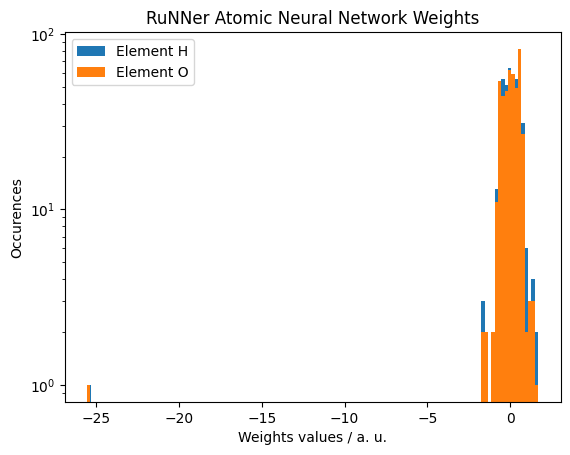

In [9]:
axes = weights.plot.hist()

Because we only trained for a single epoch on a very small dataset, the bias values of the output layer here adjusted to the atomic energies of the atoms.

## Reading weights

The `RunnerWeights` class has two different routines for parsing weights from files: `read` and `readall`: 
* The `read` routine will store the weight values from a single file, the storage key is read from the filename.
* The `readall` routine tries to read all weights found under a given `path`. 